In [1]:
from pyciss.ringcube import RingCube
import numpy as np
from matplotlib import pyplot as plt

/home/chab/miniconda3/envs/py36/lib/python3.6/site-packages/pysis/env.py:33: RuntimeWarning: Could not find isis. Is `ISISROOT` set?
  warnings.warn('Could not find isis. Is `ISISROOT` set?', RuntimeWarning)
/home/chab/miniconda3/envs/py36/lib/python3.6/site-packages/pyciss/meta.py:93: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  all_resonances = pd.concat([prime_resonances, prime_jan_epis])


/home/chab/miniconda3/envs/py36/lib/python3.6/site-packages/pysis/cubefile.py:113: RuntimeWarning: invalid value encountered in less
  data[data < self.specials['Min']] = numpy.NINF
/home/chab/miniconda3/envs/py36/lib/python3.6/site-packages/pysis/cubefile.py:114: RuntimeWarning: invalid value encountered in greater
  data[data > self.specials['Max']] = numpy.inf


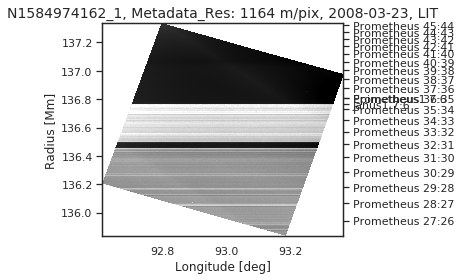

In [2]:
test1 = RingCube('N1584974162')
test1.imshow()

In [9]:
#RingCube??
test1??
#test1.minlon
#test1.mapping_label['MinimumRingLongitude']
test1.mapping_label['PixelResolution'].value

1000.0

In [3]:
#Setting up the data array to plot
data = test1.img
extent_val = test1.extent
min_, max_ = np.percentile(data[~np.isnan(data)], (1, 99))

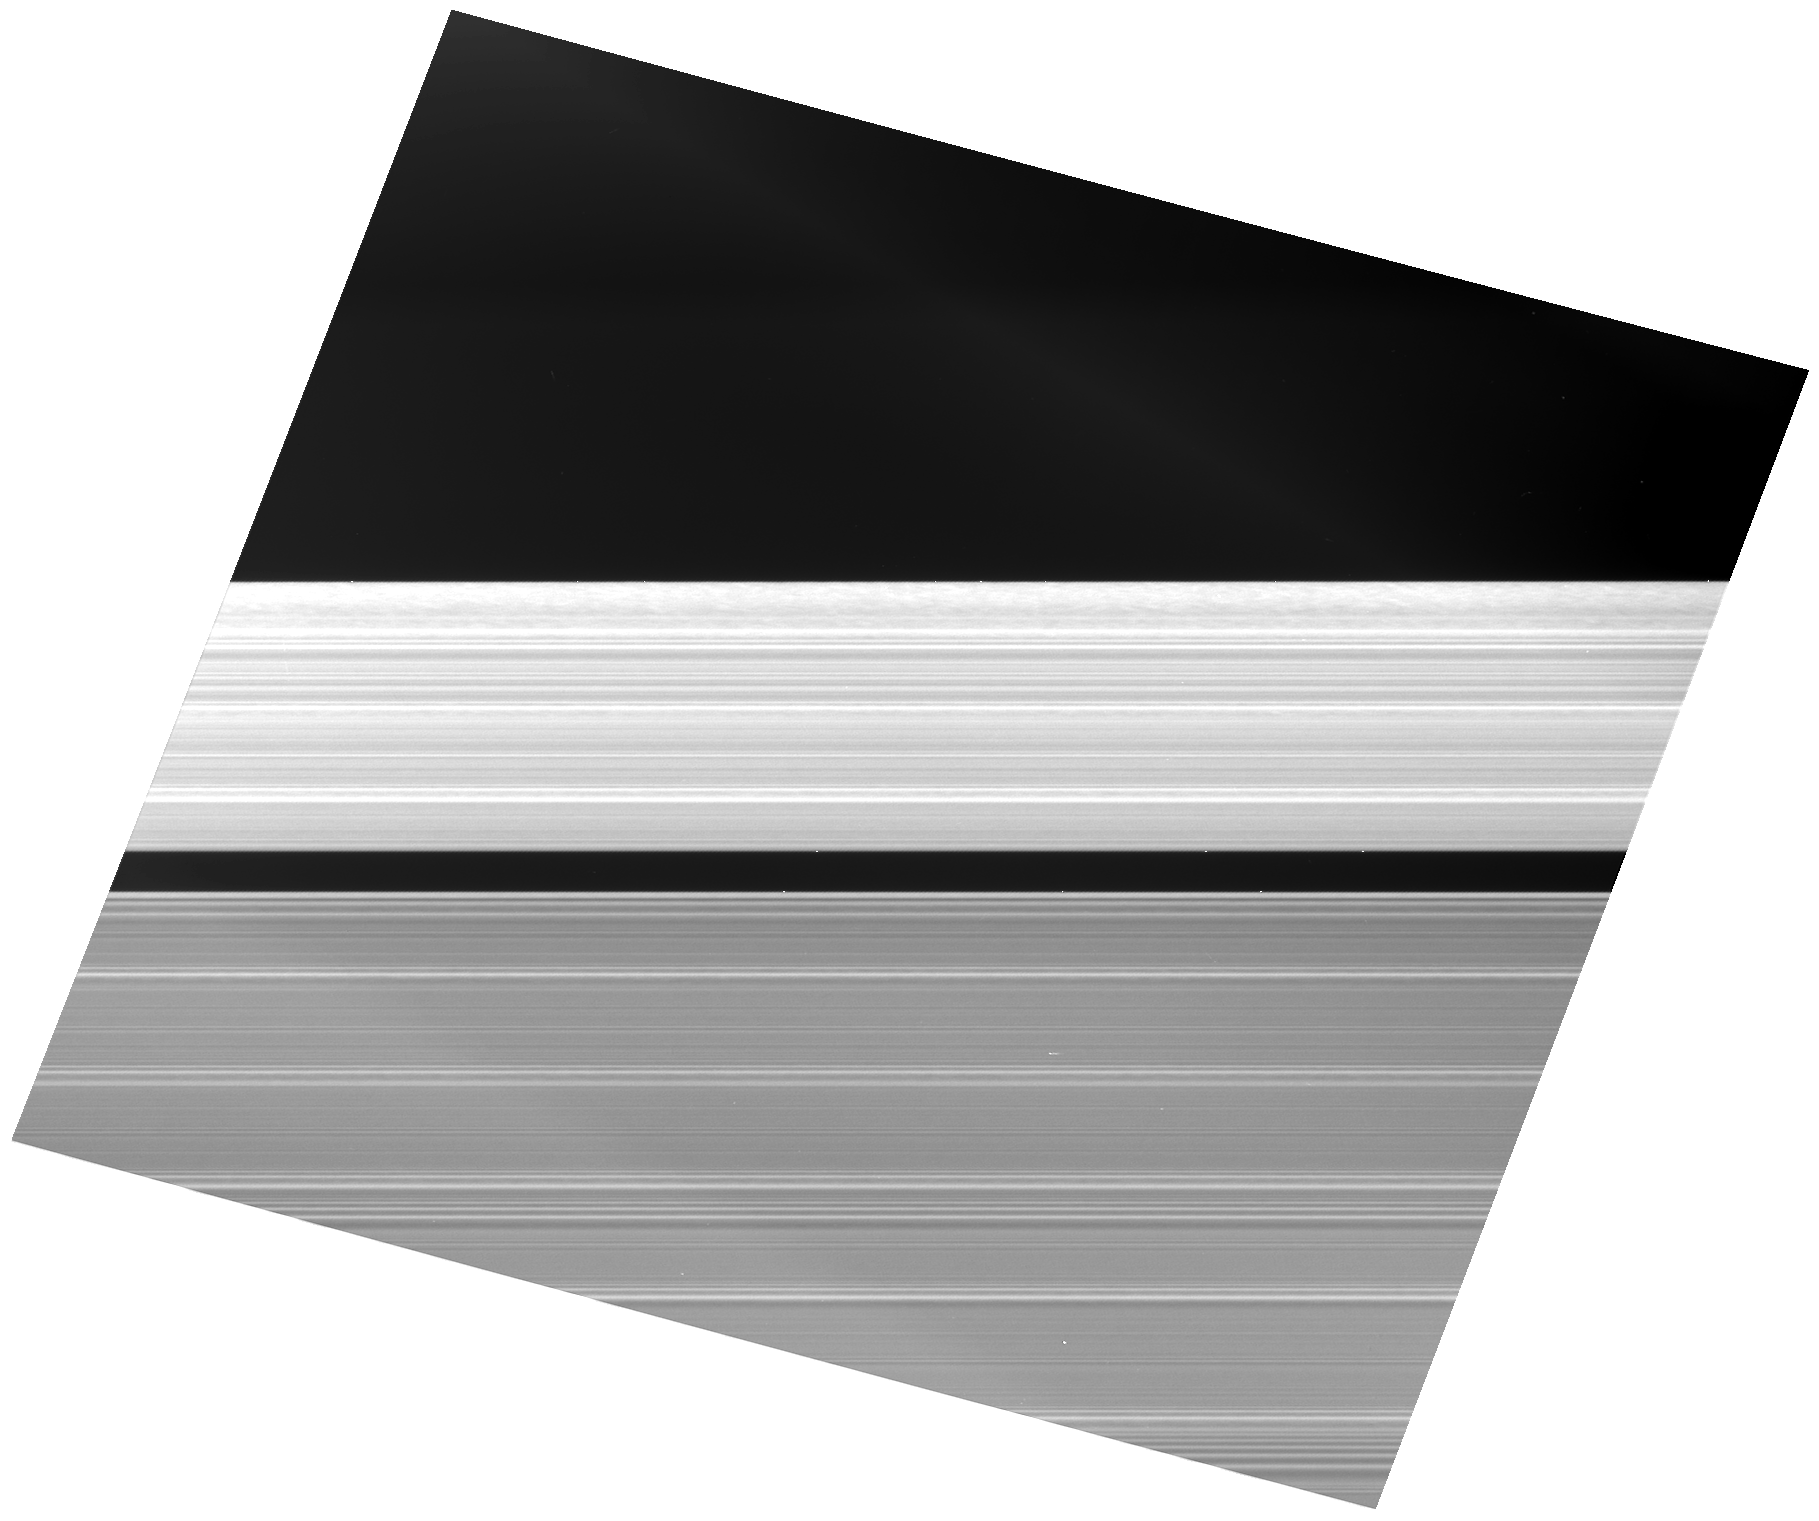

In [4]:
#Using plt.savefig
#~~~~~~~~~~~~~~~~~
#fig = plt.figure(figsize=(1799/100,1501/100), dpi=100, frameon=False)
#fig = plt.figure(figsize=(22.30462,19.40569), dpi=100, frameon=False)
fig = plt.figure(dpi=100, frameon=False)
#ax = fig.add_subplot(1, 1, 1)
ax = plt.axes([0,0,1,1])
fig.set_size_inches(17.99,15.01)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.axis('off')
#fig.set_size_inches(22.30462,19.40569)
plt.imshow(data, extent=extent_val, cmap='gray', vmin=min_, vmax=max_, interpolation='none', origin='lower', aspect='auto')
plt.ylim([135.833,137.33388])
#plt.xlim([0,1799])
#print(plt.xlim())
#print(plt.ylim())
#plt.ylim([0,1501])
plt.xlim([92.61034,93.364817])
plt.savefig('test1_savefig.png', dpi=100, format='png', bbox_inches='tight', frameon=False, pad_inches=0)

plt.show()


In [6]:
#print(data.shape[0])
test1??
#test1.minlon
test1.mapping_label['MinimumRingRadius'] / 1e6
#test1.mapping_label['PixelResolution'].value

135.83300002163

In [11]:
#Pipeline for plt.savefig
#~~~~~~~~~~~~~~~~~~~~~~~~
def RingImage(filename):
    cube = RingCube(filename)
    data = cube.img
    extent_val = cube.extent
    min_, max_ = np.percentile(data[~np.isnan(data)], (1, 99))
    w = data.shape[0] / 100.
    h = data.shape[1] / 100.
    lonMin = cube.mapping_label['MinimumRingLongitude']
    lonMax = cube.mapping_label['MaximumRingLongitude']
    radMin = cube.mapping_label['MinimumRingRadius'] / 1.0e6
    radMax = cube.mapping_label['MaximumRingRadius'] / 1.0e6
    
    fig = plt.figure(dpi=100, frameon=False)
    ax = plt.axes([0,0,1,1])
    fig.set_size_inches(w,h)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('off')
    plt.imshow(data.T, extent=extent_val, cmap='gray', vmin=min_, vmax=max_, interpolation='none', origin='lower', aspect='auto')
    plt.ylim([radMin,radMax])
    plt.xlim([lonMin,lonMax])
    plt.savefig(filename+'test_img.png', dpi=100, format='png', bbox_inches='tight', frameon=False, pad_inches=0)
    plt.close()
    return

RingImage('N1584974162')

In [6]:
#Using plt.imsave
#~~~~~~~~~~~~~~~
plt.imsave('test1_imsave.png',data,vmin=min_,vmax=max_,cmap='gray',format='png',origin='lower')

In [7]:
from pyciss import plotting
#plotting??

/home/chab/miniconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:908: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


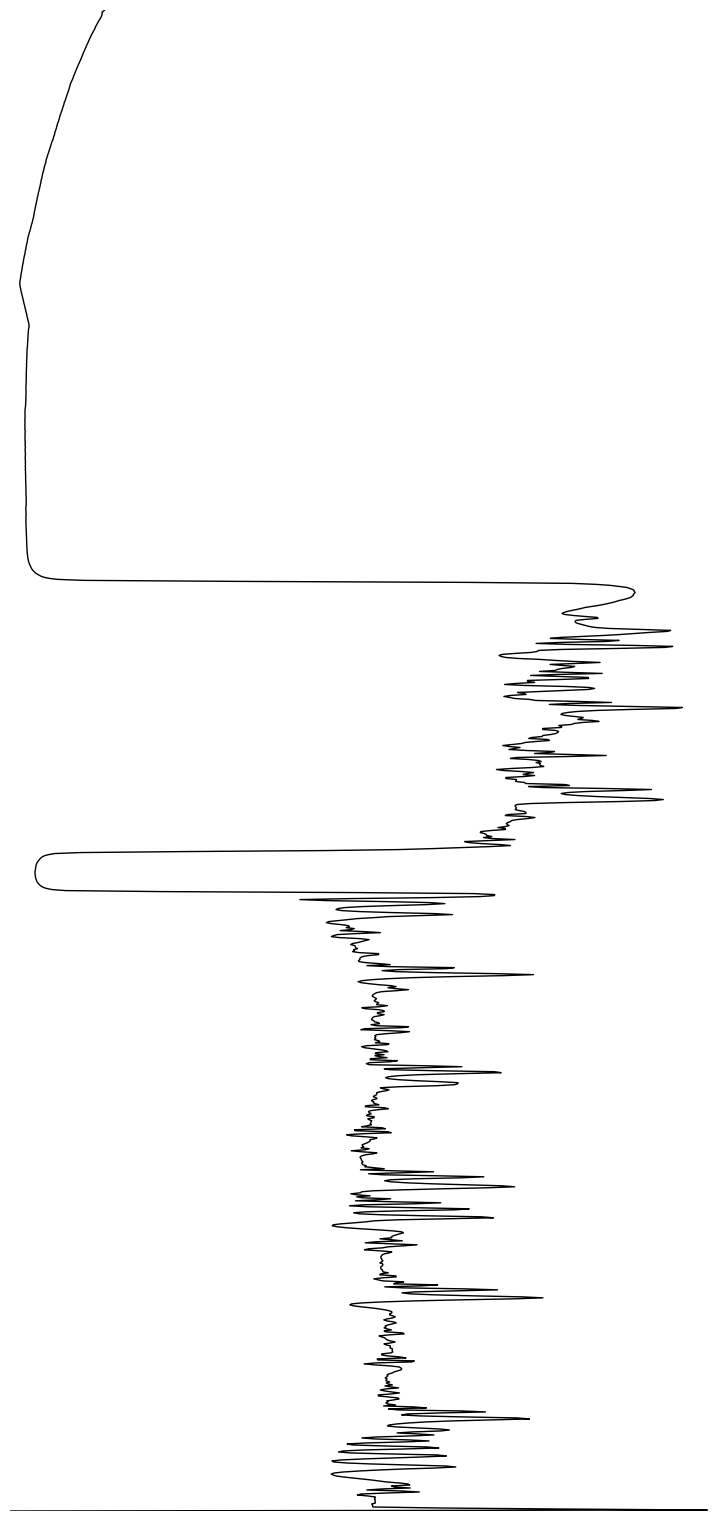

In [8]:
#Intensity plot
ifs = np.nanmedian(data, axis=1)
ifs = np.nan_to_num(ifs)
ifs[ifs < 0] = 0

fig = plt.figure(dpi=100, frameon=False)
#ax = fig.add_subplot(1, 1, 1)
ax = plt.axes([0,0,1,1])
#fig.set_size_inches(17.99,15.01)
fig.set_size_inches(7.,15.01)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.axis('off')
plt.plot(ifs, np.linspace(*test1.extent[2:], data.shape[0]), color='black', lw=1)
plt.xlim([0.0,0.034])
plt.ylim([135.83300002163,137.3338767189])
plt.savefig('plot1_savefig.png', dpi=100, format='png', bbox_inches='tight', frameon=False, pad_inches=0)
plt.show()

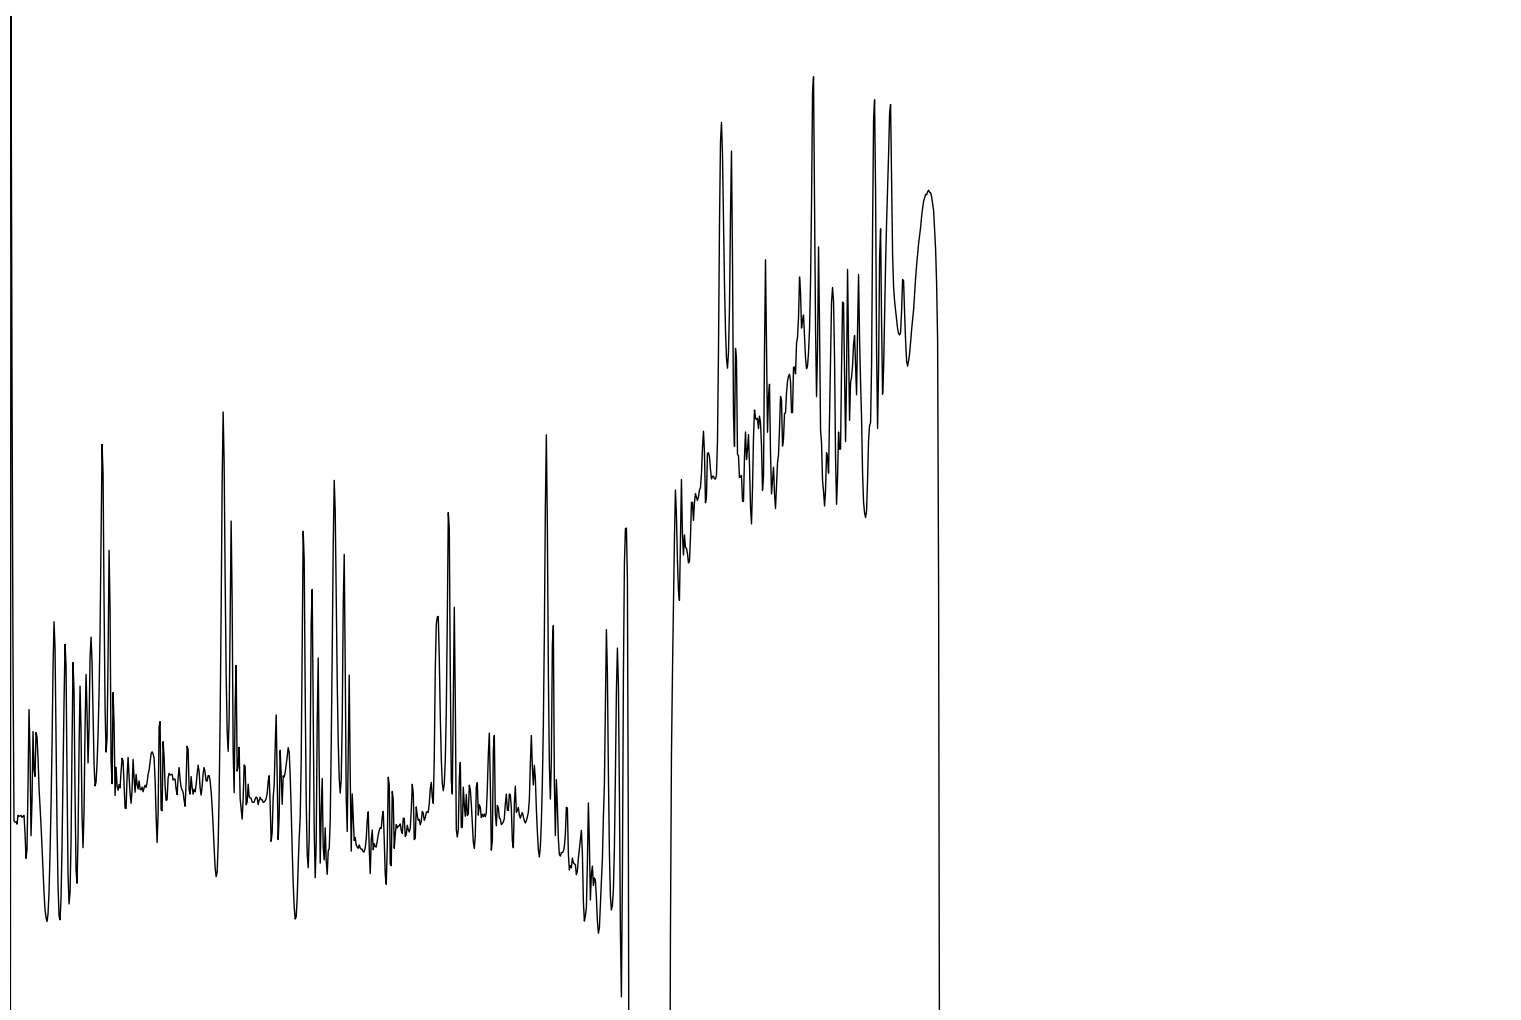

In [9]:
#Intensity plot: Rotated /#Cutoff
#ifsN = ifs
#ifsN[np.where(ifs < (np.median(ifs)-(0.2*np.median(ifs))))] = (np.median(ifs)-(0.2*np.median(ifs)))

fig = plt.figure(facecolor='white', dpi=100)
#ax = fig.add_subplot(1, 1, 1)
ax = plt.axes([0,0,1,1])
#fig.set_size_inches(15.01,17.99)
fig.set_size_inches(15.01,10.)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.axis('off')
plt.plot(np.linspace(*test1.extent[2:], data.shape[0]), ifs, color='black', lw=1)
#plt.ylim([0.0,0.034])
plt.ylim([(np.median(ifs)-(0.2*np.median(ifs))),0.034])
plt.xlim([135.83300002163,137.3338767189])
plt.savefig('plot1_savefigRot.png', dpi=100, format='png', bbox_inches='tight', pad_inches=0)
plt.show()

In [45]:
ifsMed = np.median(ifs)
ifsMean = np.mean(ifs)
MedDiffMean = np.abs(ifsMed - ifsMean)
Med20Diff = np.abs(ifsMed - (0.2 * ifsMed))

0.01727127656340599
0.017985606731674438


In [ ]:
#Intensity plot: Pipeline
ifs = np.nanmedian(data, axis=1)
ifs = np.nan_to_num(ifs)
ifs[ifs < 0] = 0

ifsN = ifs
ifsN[np.where(ifs < (np.median(ifs)-(0.2*np.median(ifs))))] = (np.median(ifs)-(0.2*np.median(ifs)))

fig = plt.figure(facecolor='white', dpi=100)
ax = plt.axes([0,0,1,1])
fig.set_size_inches(15.01,8.)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.axis('off')
plt.plot(np.linspace(*test1.extent[2:], data.shape[0]), ifsN, color='black', lw=1)
plt.ylim([(np.median(ifs)-(0.2*np.median(ifs))),0.034])
plt.xlim([135.83300002163,137.3338767189])
plt.savefig('plot1_savefigRot.png', dpi=100, format='png', bbox_inches='tight', pad_inches=0)
plt.show()

In [33]:
#####~~~~~FAILED
#xtest = np.linspace(*test1.extent[2:], data.shape[0])
#for i in np.arange(1501):
#    print(xtest[i+1]-xtest[i])
print(max(ifs))
print(max(np.linspace(*test1.extent[2:], data.shape[0])))
print(min(np.linspace(*test1.extent[2:], data.shape[0])))

0.03386862762272358
137.3338767189
135.83300002163


[[0. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


(-0.5, 1798.5, 1500.5, -0.5)

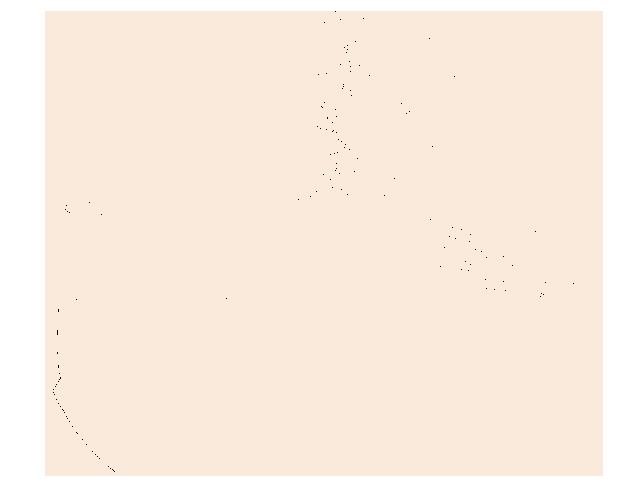

In [105]:
#####~~~~~FAILED
y_step = 0.00001884
x = np.arange(1501)
y = np.round(ifs / y_step).astype(int)
xMin, xMax = np.min(x), np.max(x)
yMin, yMax = np.min(y), np.max(y)

newArray = np.ones((xMax - xMin + 1, yMax - yMin + 1))
newArray[x - xMin, y - yMin] = np.zeros(1501)

print(newArray)
#print(ifs/0.0001)
fig = plt.figure(figsize=(10,10))
plt.imshow(newArray)
plt.axis('off')